# 多クラス分類：ニュース配信の分類

In [91]:
from keras.datasets import reuters

In [92]:
(train_data, train_labels),(test_data, test_labels) = reuters.load_data(num_words = 10000) 

In [93]:
len(train_data)

8982

In [94]:
len(test_data)

2246

In [95]:
train_data.shape

(8982,)

In [96]:
# マッピング用辞書
word_index = reuters.get_word_index()
# 単語をマッピング
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])
reverse_word_index
# デコード
# インデックス
decoded_newswire = ' '.join([reverse_word_index.get(i - 3, '?') for i in train_data[0]])
decoded_newswire

'? ? ? said as a result of its december acquisition of space co it expects earnings per share in 1987 of 1 15 to 1 30 dlrs per share up from 70 cts in 1986 the company said pretax net should rise to nine to 10 mln dlrs from six mln dlrs in 1986 and rental operation revenues to 19 to 22 mln dlrs from 12 5 mln dlrs it said cash flow per share this year should be 2 50 to three dlrs reuter 3'

In [78]:
# one-hot encording
import numpy as np

# 形状を(samples, word_indices)に変換
def vectorise_sequences(sequences, dimension=10000):
    
    # 形状が(len(sequences), dimension)の行列（０埋め）
    results = np.zeros((len(sequences), dimension))
    
    # 出現した単語に1を割り当て
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1 #results[i]のインデックスに1を設定 sequenceの値に一致すつ列に1を立てる 
    
    return results

In [79]:
x_train =vectorise_sequences(train_data)
x_test =vectorise_sequences(test_data)

In [80]:
# kerasライブラリを使う方法
from keras.utils.np_utils import to_categorical
one_hot_train_labels = to_categorical(train_labels)
one_hot_test_labels = to_categorical(test_labels)

In [99]:
x_train.shape

(8982, 10000)

In [82]:
# ラベルは46種類
import collections
collections.Counter(train_labels)

Counter({0: 55,
         1: 432,
         2: 74,
         3: 3159,
         4: 1949,
         5: 17,
         6: 48,
         7: 16,
         8: 139,
         9: 101,
         10: 124,
         11: 390,
         12: 49,
         13: 172,
         14: 26,
         15: 20,
         16: 444,
         17: 39,
         18: 66,
         19: 549,
         20: 269,
         21: 100,
         22: 15,
         23: 41,
         24: 62,
         25: 92,
         26: 24,
         27: 15,
         28: 48,
         29: 19,
         30: 45,
         31: 39,
         32: 32,
         33: 11,
         34: 50,
         35: 10,
         36: 49,
         37: 19,
         38: 19,
         39: 24,
         40: 36,
         41: 30,
         42: 13,
         43: 21,
         44: 12,
         45: 18})

In [100]:
from keras import models
from keras import layers

model = models.Sequential()
model.add(layers.Dense(64, activation="relu", input_shape=(10000,)))
model.add(layers.Dense(64, activation="relu"))
model.add(layers.Dense(46, activation="softmax")) # 確率分布

In [101]:
# モデルのコンパイル
model.compile(optimizer='rmsprop',
             loss='categorical_crossentropy',
             metrics=['accuracy'])

In [102]:
# 検証データセットの設定
x_val = x_train[:1000]
partal_x_train  =x_train[1000:]

y_val = one_hot_train_labels[:1000]
partal_y_train  =one_hot_train_labels[1000:]

In [103]:
history = model.fit(partal_x_train,
                   partal_y_train,
                   epochs=20,
                   batch_size=512,
                   validation_data=(x_val, y_val))

Train on 7982 samples, validate on 1000 samples
Epoch 1/20
7982/7982 [==============================] - 2s 230us/step - loss: 2.5322 - acc: 0.4955 - val_loss: 1.7204 - val_acc: 0.6120
Epoch 2/20
7982/7982 [==============================] - 1s 104us/step - loss: 1.4450 - acc: 0.6878 - val_loss: 1.3457 - val_acc: 0.7060
Epoch 3/20
7982/7982 [==============================] - 1s 104us/step - loss: 1.0951 - acc: 0.7648 - val_loss: 1.1704 - val_acc: 0.7420
Epoch 4/20
7982/7982 [==============================] - 1s 107us/step - loss: 0.8695 - acc: 0.8161 - val_loss: 1.0796 - val_acc: 0.7590
Epoch 5/20
7982/7982 [==============================] - 1s 104us/step - loss: 0.7030 - acc: 0.8477 - val_loss: 0.9846 - val_acc: 0.7810
Epoch 6/20
7982/7982 [==============================] - 1s 105us/step - loss: 0.5665 - acc: 0.8794 - val_loss: 0.9414 - val_acc: 0.8020
Epoch 7/20
7982/7982 [==============================] - 1s 112us/step - loss: 0.4581 - acc: 0.9050 - val_loss: 0.9079 - val_acc: 0.8000


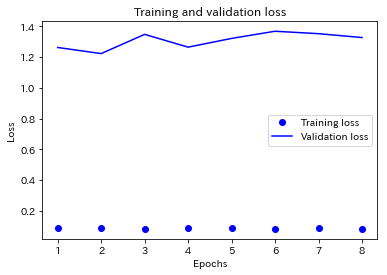

In [115]:
# 訓練データと検証データでの損失率をプロット
import matplotlib.pyplot as plt

history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']

epochs = range(1, len(loss_values) + 1)

plt.plot(epochs, loss_values, 'bo', label='Training loss')
plt.plot(epochs, val_loss_values, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

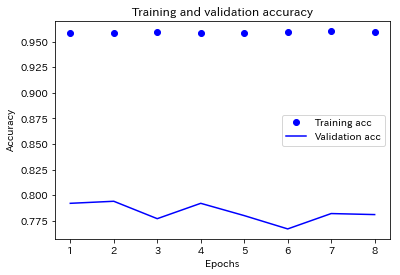

In [116]:
# 訓練データと検証データでの正解率をプロット
acc = history_dict['acc']
val_acc_values = history_dict['val_acc']

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc_values, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

In [117]:
model.fit(partal_x_train,
                   partal_y_train,
                   epochs=8,
                   batch_size=512,
                   validation_data=(x_val, y_val))

Train on 7982 samples, validate on 1000 samples
Epoch 1/8
7982/7982 [==============================] - 1s 105us/step - loss: 0.0809 - acc: 0.9594 - val_loss: 1.3297 - val_acc: 0.7950
Epoch 2/8
7982/7982 [==============================] - 1s 105us/step - loss: 0.0849 - acc: 0.9587 - val_loss: 1.3250 - val_acc: 0.7870
Epoch 3/8
7982/7982 [==============================] - 1s 104us/step - loss: 0.0806 - acc: 0.9605 - val_loss: 1.3669 - val_acc: 0.7760
Epoch 4/8
7982/7982 [==============================] - 1s 102us/step - loss: 0.0818 - acc: 0.9585 - val_loss: 1.3714 - val_acc: 0.7800
Epoch 5/8
7982/7982 [==============================] - 1s 102us/step - loss: 0.0816 - acc: 0.9598 - val_loss: 1.4468 - val_acc: 0.7690
Epoch 6/8
7982/7982 [==============================] - 1s 109us/step - loss: 0.0792 - acc: 0.9598 - val_loss: 1.4035 - val_acc: 0.7740
Epoch 7/8
7982/7982 [==============================] - 1s 105us/step - loss: 0.0816 - acc: 0.9573 - val_loss: 1.3607 - val_acc: 0.7820
Epoch 8

In [118]:
results = model.evaluate(x_test, one_hot_test_labels)
results

2246/2246 [==============================] - 0s 128us/step


[1.6780145495254231, 0.76357969729261321]

In [121]:
# 予測
preds = model.predict(x_test)

In [122]:
preds[0].shape

(46,)

In [123]:
np.sum(preds[0])

1.0000001

In [124]:
np.argmax(preds[0])

3